In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [2]:
# !pip install --upgrade scikit-learn

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/Project LR || WIP/Zomato dataset/Clean_data.csv')

In [4]:
dataset.head(5)

# i will droped some column

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Distance_km,time_diff_order_pickup,time_diff_order_pickup_minutes
0,0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,...,2,Snack,motorcycle,0,No,Urban,24,3.02,0 days 00:15:00,15
1,1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,...,2,Snack,scooter,1,No,Metropolitian,33,20.14,0 days 00:05:00,5
2,2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,...,0,Drinks,motorcycle,1,No,Urban,26,1.55,0 days 00:15:00,15
3,3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,...,0,Buffet,motorcycle,1,No,Metropolitian,21,7.77,0 days 00:10:00,10
4,4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,...,1,Snack,scooter,1,No,Metropolitian,30,6.20,0 days 00:15:00,15


In [5]:
dataset[dataset.select_dtypes(include='object').columns]

# need to delete some columns

#  Time_Orderd,Time_Order_picked,Unnamed: 0

dataset.drop(['Time_Orderd','Time_Order_picked','Unnamed: 0'],axis=1,inplace=True)

In [6]:
dataset.select_dtypes(include='int').columns

Index(['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries',
       'Time_taken', 'time_diff_order_pickup_minutes'],
      dtype='object')

In [7]:
dataset.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Distance_km,time_diff_order_pickup,time_diff_order_pickup_minutes
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.02,0 days 00:15:00,15
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.14,0 days 00:05:00,5
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.55,0 days 00:15:00,15
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.77,0 days 00:10:00,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.20,0 days 00:15:00,15


In [8]:
input_var=dataset.drop(['Time_taken'],axis=1)
output_var=dataset['Time_taken']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.2, random_state=42)

In [10]:
#Regression analysis

import statsmodels.api as sm
X = sm.add_constant(input_var.select_dtypes(include='number'))
model = sm.OLS(output_var, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     2520.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:43:07   Log-Likelihood:            -1.3222e+05
No. Observations:               38904   AIC:                         2.645e+05
Df Residuals:                   38893   BIC:                         2.646e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Columns transformer

In [11]:
# Weatherconditions- ordinal encoading
# Road_traffic_density- ordinal encoding
# Type_of_order - ordinal encoading
# Type_of_vehicle - ordinal encoading
# Festival - ordinal
# City - Label Encoding

In [12]:
# Transformer

c1 = ColumnTransformer(
    transformers=[
        ("t1", OrdinalEncoder(), [
            'Weatherconditions',
            'Road_traffic_density',
            'Type_of_order',
            'Type_of_vehicle',
            'Festival',
            'time_diff_order_pickup'
        ]),
        ("t2", StandardScaler(), [
            'Delivery_person_Age',
            'Delivery_person_Ratings',
            'Restaurant_latitude',
            'Restaurant_longitude',
            'Delivery_location_latitude',
            'Delivery_location_longitude',
            'Vehicle_condition',
            'multiple_deliveries',
            'Distance_km'
        ]),
        ("t3", OneHotEncoder(drop='first'), ['City'])
    ],
    remainder='passthrough'
)

# Making pipelines


lr=LinearRegression()
pipe=make_pipeline(c1,lr)

pipe.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  ['Weatherconditions',
                                                   'Road_traffic_density',
                                                   'Type_of_order',
                                                   'Type_of_vehicle',
                                                   'Festival',
                                                   'time_diff_order_pickup']),
                                                 ('t2', StandardScaler(),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Restaurant_latitude',
                                                   'Restaurant_longitude',
                                                   'Delivery_location_latitude',
                                                   'Delivery_location_longitude',
                                                   'Vehicle_condition',
                                                   'multiple_deliveries',
                                                   'Distance_km']),
                                                 ('t3',
                                                  OneHotEncoder(drop='first'),
                                                  ['City'])])),
                ('linearregression', LinearRegression())])

In [13]:
y_pred=pipe.predict(x_test)

In [14]:
r2_score(y_test,y_pred)

0.49287436739057555

In [15]:
# lmplot -
# mean squred error- mean abssolute error
pipe.fit(x_train, y_train)

# Access the linear regression model from the pipeline
model = pipe.named_steps['linearregression']  # or 'model' if you named it differently

# Retrieve coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
# print("Intercept:", intercept)

Coefficients: [-8.85255341e-01 -1.70105053e+00  2.04308939e-02 -4.99724438e-01
  1.09606475e+01  1.48917433e+00  2.19655583e+00 -1.97303463e+00
 -1.37141063e+06  8.77988989e+05  1.37188042e+06 -8.78039699e+05
 -1.73163611e+00  2.02437961e+00  9.55983985e+00  1.05401903e+01
 -2.29228289e+00 -2.91776841e-01]


In [16]:
print('mean absolute Error ',mean_absolute_error(y_test,y_pred))
print('mean squared Error ',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

mean absolute Error  5.296526256310337
mean squared Error  43.11569723174738
RMSE 6.566254429410072


In [17]:
# Calculating adjusted r2 score

r_squared = r2_score(y_test, y_pred)

# Number of observations and predictors
n = len(y_test)  # number of observations
p = X.shape[1]   # number of predictors

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
adjusted_r_squared

0.49215633650388435

In [18]:
redudual= y_test-y_pred

In [20]:
redudual.head(2)

,Time_taken
18536,-0.100573
36239,-3.125389


<ipython-input-21-6d4a485e35b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(redudual)


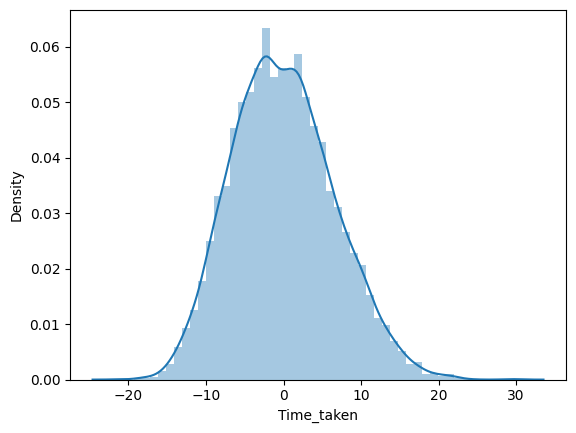

In [21]:
sns.distplot(redudual)
plt.show()

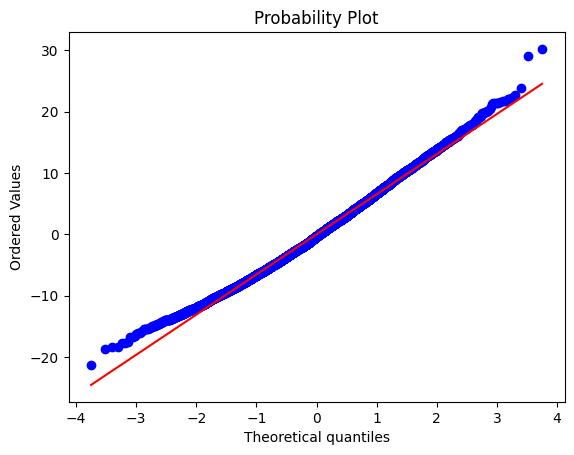

In [22]:
import pylab
import scipy.stats as stats
stats.probplot(redudual, dist="norm", plot=pylab)
pylab.show()

# Model conclusion

In [23]:
# Initial Data Overview

# In the initial stage, we had a total of 18 columns and 30,000 rows.
# We cleaned the data and converted some columns to numeric types. Additionally, we applied StandardScaler to minimize the impact of high values by normalizing the data.
# Finally, we utilized a ColumnTransformer and a pipeline to streamline the modeling process.

# Model Performance

# The linear regression model did not perform well with this data, so we are exploring alternative models.
# The R-squared score is 49%, with the adjusted R-squared being approximately the same, indicating that we are only explaining 49% of the variance in the dataset.

# Performance Metrics

# Mean Absolute Error (MAE): 5.30
# Mean Squared Error (MSE): 43.12
# Root Mean Squared Error (RMSE): 6.57

